### Evaluate the detection method, creating Metrics and Points Per Scenario

In [8]:
import matplotlib.pyplot as plt
import os
import numpy as np

#### Set paths
<div class="alert alert-block alert-warning">
<h4>ToDo:</h4>
<ol>
    <li> Set "coda_root" to the root of your <b>CODA directory</b>
    <li> Set "log_finn_root" to the root of your <b>inference directory</b>.
</ol>
</div>

In [9]:
coda_root = f'/disk/ml/own_datasets/CODA'
log_finn_root = f'/disk/vanishing_data/ju878/log_finn/'

In [10]:
model_root = os.path.realpath('../../../model_contradictions/')
graphics_root = os.path.join(model_root, 'graphics')

eval_all_root = os.path.join(log_finn_root, 'groundtruth_eval_all')
eval_all_counts_file = os.path.join(eval_all_root, 'counts.txt')

#### Prepare data for each dataset

Corresponding scenario to each position in the "eval_all_counts" array

    number in array:   0      1     2    3     4    5    6    7     8    9   10  11  12  13  14  15  16  17    18         19           20
    scenario:         c_11, c_12, c_13, c_14, c11, c12, c13, c14, c_10, c10, c1, c2, c3, c4, tp, fp, fn, tn, total, original_total, new_label_total

Load data for each dataset

In [11]:
# loads "counts.txt" from image based comparison between ground truth and detection method
eval_all_counts = np.loadtxt(eval_all_counts_file, delimiter=',')

eval_once_counts = eval_all_counts[:1034]
eval_kitti_counts = eval_all_counts[1034:1341]
eval_nuscenes_counts = eval_all_counts[1341:]

# Used for Points per Scenario
sum_all_counts = np.sum(eval_all_counts, axis=0)
sum_once_counts = np.sum(eval_once_counts, axis=0)
sum_kitti_counts = np.sum(eval_kitti_counts, axis=0)
sum_nuscenes_counts = np.sum(eval_nuscenes_counts, axis=0)

sum_all = [sum_all_counts, sum_once_counts, sum_kitti_counts, sum_nuscenes_counts]

Set labels

In [12]:
names = ['CODA', 'CODA-ONCE', 'CODA-KITTI', 'CODA-nuScenes']
scenario_labels = ['1', '2', '3', '4']

#### Create Points per scenario as defined by Sartoris

In [13]:
def addlabels(x,y):
    for i in range(len(x)):
        if y[i] == 0:
            plt.text(i,y[i]+1.5,int(y[i]), ha = 'center')
            continue
        plt.text(i,y[i]*1.005,int(y[i]), ha = 'center')

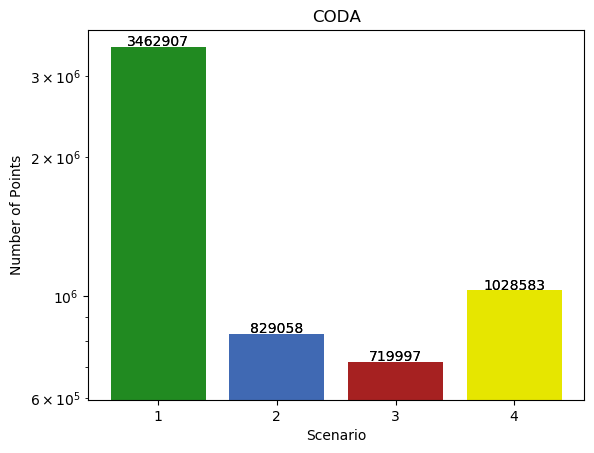

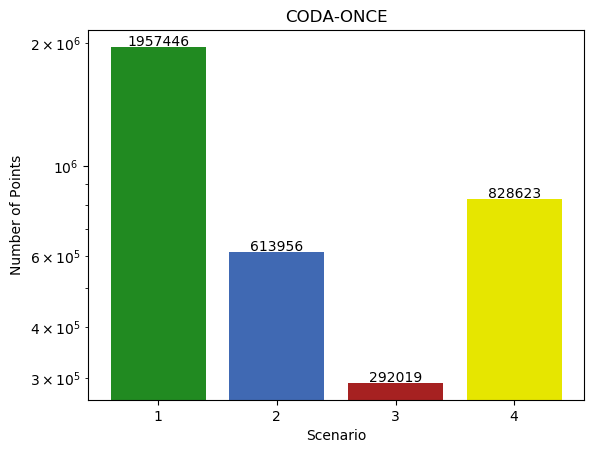

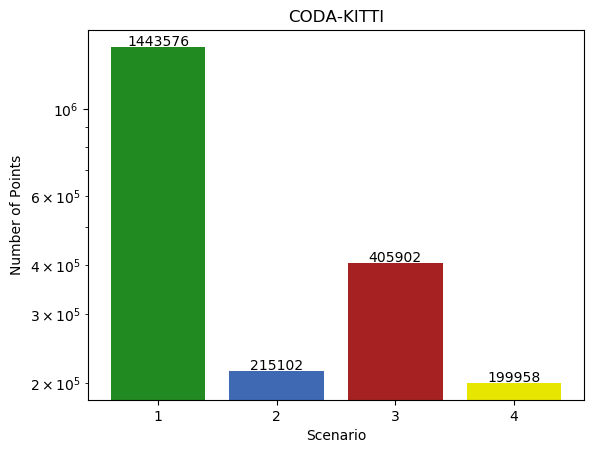

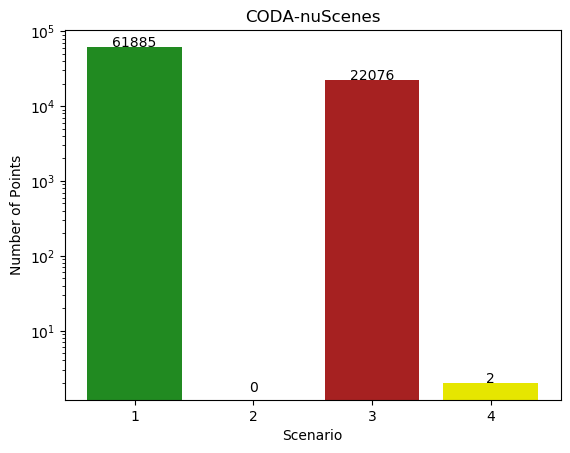

In [14]:
for index, s in enumerate(sum_all):
    scenario1 = s[0] + s[4] + s[10]
    scenario2 = s[1] + s[5] + s[11]
    scenario3 = s[2] + s[6] + s[12]
    scenario4 = s[3] + s[7] + s[13] 
    scenarios = [scenario1, scenario2, scenario3, scenario4]
    
    plt.bar(scenario_labels, scenarios, color=[(0.13,0.54,0.13), (0.25,0.41,0.7), (0.65,0.13,0.13), (0.9,0.9,0)])
    addlabels(scenario_labels, scenarios)
    plt.xlabel('Scenario')
    plt.ylabel('Number of Points')
    plt.yscale('log')
    plt.title(f'{names[index]}')
    
    plt.savefig(os.path.join(graphics_root, f'points_per_scenario_{names[index]}.svg'), format='svg', dpi=1200)
    plt.show()
    plt.close()